# Profitable apps for Google Play and App Store

Apps are of two types: **Paid** and **Free.** The revenue for both types is different. For paid apps, the revenue is, the purchase made by user while downloading the app. For free apps, the main source of revenue would be in-app adds meaning the number of users determine the revenue - the more users who see and engage with the ads, the better.

Since, we are developing an free app, we would like to see what type of free apps does have the more users. The main aim of this project is to determine what type of apps are more likely to attract the users. 

## About the data

Since, the main goal of the analysis is to find out what kind of free mobile apps the users are more likely to download. So, we need to collect and analyze the data about mobile apps available on both Google Play and App store.

As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.

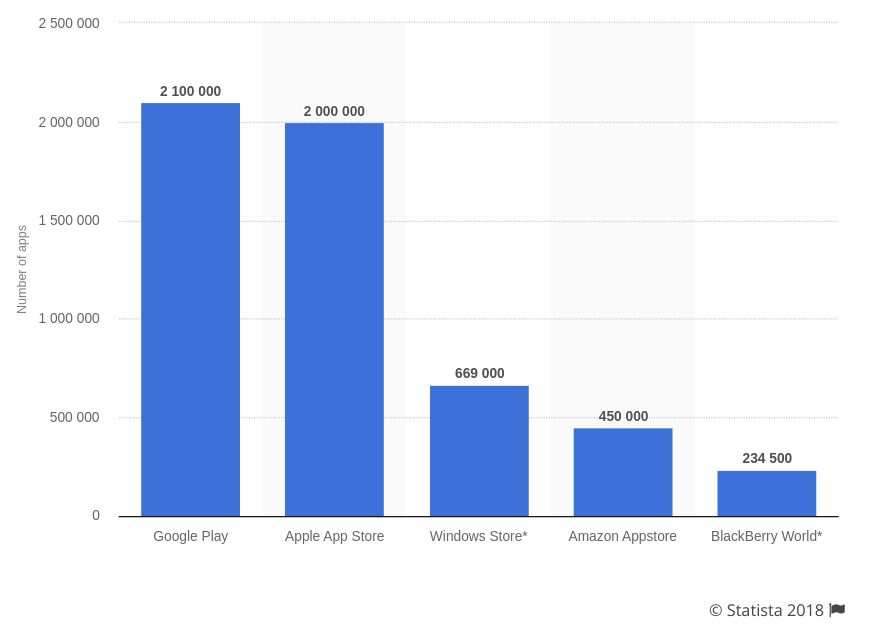

The dataset used for this analysis are readily available on Kaggle.

1. The [dataset](https://www.kaggle.com/lava18/google-play-store-apps) containing data about approximately 10,000 apps from Google Play.
2. The [dataset](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) containing data about approximately 7,000 iOS apps from the App Store.

Let's start by exploring the dataset

In [2]:
from csv import reader

# Opening the dataset of Apple store
open_apple = open('AppleStore.csv', encoding='utf8')
read_apple = reader(open_apple)
ios = list(read_apple) # Converting them into a lists of list

# Opening the dataset of Google play
open_google = open('googleplaystore.csv', encoding='utf8')
read_google = reader(open_google)
android = list(read_google) # Converting them into a lists of list

In [3]:
# Since there are two datasets, creating a function to use them so that rows can be printed in a readable way.

def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

Let's take a look at the dataset of iOS and print a few rows of the dataset.

In [5]:
explore_data(ios, 0, 3, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


Number of rows: 7198
Number of columns: 16


Similarly, let's take a look at the dataset of Google Play and print a few rows.

In [6]:
explore_data(android, 0, 3, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


Number of rows: 10842
Number of columns: 13


We can see that the app store data has 16 columns whereas the google play has 13 columns. Let's take a look at the columns of each dataset and figure out what the column information is about.

In [17]:
ios_header = ios[0]
android_header = android[0]

print(ios_header)
print('\n')
print(android_header)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


We have opened the datsets and explored it a bit. Before beginning our analysis, we must ensure that the data is accurate, if not, our analysis will be wrong. This basically means:
1. We need to detect inaccurate data and correct or remove it.
2. Detect duplicate data and delete it.

We need to remove apps that are free and which are non-English.

Looking at one of the [discussion](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015), we have found that the Google Play dataset has an error. Let's check the error and delete it.

In [22]:
print(android_header) # Printing header to check the values with the data
print('\n')
print(android[10473]) # The incorrect data
print('\n')
print(android[1]) # Checking it against a proper data

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


We can see that the incorrect data has a category column missing. And this has made a column shift in the rows after this particular data. Now, let's get rid of it.

In [23]:
# Getting rid of the incorrect data using del statement

del android[10473]

## Removing duplicate data

Upon further looking at the [discussion](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) we can notice that some apps have duplicate entries.

In [26]:
for app in android:
    name = app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


Let's check the number of instances where an app has occured more than once and separate the duplicate apps.

In [28]:
duplicate_apps = []
unique_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
        
print('Number of duplicate apps:', len(duplicate_apps))
print('\n')
print('Examples of duplicate apps:', duplicate_apps[:10])

Number of duplicate apps: 1181


Examples of duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack']


We don't want to count certain apps more than once when we analyze data, so we need to remove the duplicate entries and keep only one entry per app. One thing we could do is remove the duplicate rows randomly, but we could probably find a better way.

If we look closely at the rows we printed for `Instagram` app, on the fourth position of each row corresponds to the number of reviews. The different numbers show the data was collected at different times.

We can use this information to build a criterion for removing the duplicates. The higher the number of reviews, the more recent the data should be. Rather than removing duplicates randomly, we'll only keep the row with the highest number of reviews and remove the other entries for any given app.

Now we know that the number of duplicate apps is 1181. After we remove the duplicates, we should be left with 9660 rows.(Including the header)

In [30]:
print('Expected length:', len(android) - 1181)

Expected length: 9660


To remove the duplicates, we will do the following:

* Create a dictionary, where each dictionary key is a unique app name and the corresponding dictionary value is the highest number of reviews of that app.
* Use the information stored in the dictionary and create a new dataset, which will have only one entry per app (and for each app, we'll only select the entry with the highest number of reviews).

In [31]:
reviews_max = {}

for row in android[1:]: #Excluding the header
    name = row[0] # Name of the app
    n_reviews = float(row[3]) # The number of reviews
    
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
    elif name not in reviews_max:
        reviews_max[name] = n_reviews

Let's confirm that the length of the dictionary created is same as our expected length.

In [36]:
print('Expected length:', len(android[1:]) - 1181) #Excluding the header
print('Length of dictionary:', len(reviews_max))

Expected length: 9659
Length of dictionary: 9659


Now that we have got the dictionary of apps without any duplicate values. We will use that to clean the main dataset of Play Store and remove all duplicate values.

In [41]:
android_clean = [] # Store the new cleaned data set
already_added = [] # Will store the app names

for row in android[1:]:
    name = row[0]
    n_reviews = float(row[3])
    
    if n_reviews == reviews_max[name] and name not in already_added:
        android_clean.append(row)
        already_added.append(name)

Checking the length of the android_clean list to make sure it matches the expected length.

In [43]:
len(android_clean)

9659

Now that we have got rid of the duplicate data. Let's move on to the next step. Since, the app which we are going to create are geared towards English-speaking audience. We have found that both the datasets have apps with names that they suggest they are not designed for English-speaking audience. Let's take a look at such apps.

In [45]:
print(ios[814][1])
print(ios[6732][1])
print('\n')
print(android_clean[4412][0])
print(android_clean[7940][0])

爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜


中国語 AQリスニング
لعبة تقدر تربح DZ


The numbers corresponding to the characters we commonly use in an English text are all in the range 0 to 127, according to the [ASCII](https://en.wikipedia.org/wiki/ASCII) system. Based on this number range, we will build a function that detects whether a character belongs to the set of common English characters or not. If the number is equal to or less than 127, then the character belongs to the set of common English characters.

In [56]:
def is_english(words):
    count = 0
    for word in words:
        if ord(word) > 127:
            count += 1
    if count > 3:
        return False
    else:
        return True

In [57]:
# Checking if the function works properly with a few arguments

print(is_english('Instagram'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

True
False
True
True


Using the function which we have created to filter out non-English apps from both datasets.

In [66]:
ios_english = []
android_english = []

# For ios
for row in ios[1:]:
    name = row[0]
    if is_english(name):
        ios_english.append(row)
        
# For Play Store
for row in android_clean:
    name = row[0]
    if is_english(name):
        android_english.append(row)

Now let's explore our both the cleaned datasets

In [71]:
explore_data(ios_english, 0, 3, True)
print('\n')
explore_data(android_english, 0 , 3, True)

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 7197
Number of columns: 16


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Vari

So far we have removed inaccurate data, duplicate entries and non-English apps. Since, we are focusing only on free apps because the main source of revenue consists of in-app ads. 

Our dataset contains both free and non-free apps, we need to isolate the free apps for our analysis.


In [74]:
free_apps_ios = []
free_apps_android = []

for row in ios_english:
    price = row[4]
    if price == '0.0':
        free_apps_ios.append(row)
        
for row in android_english:
    price = row[7]
    if price == '0':
        free_apps_android.append(row)

In [75]:
print(len(free_apps_ios))
print(len(free_apps_android))

4056
8864


Like we mentioned in the beginning of the analysis, the goal of the analysis is to determine the kinds of apps that are likely to attract more users because the number of people using our apps affect our revenue.

So in order to minimize risks and overhead, our validation strategy for an app will be:

1. Build a minimal Android version of the app, and add it to Google Play.
2. If the app has a good response from users, we develop it further.
3. If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

The end goal is to add the app on both Google Play and App Store, so we need to find a profile that works for both the markets.

We will do this by finding the most common genre for each market and do that, we will build a frequency table for few columns.

We will build two functions we can use to analyze the frequency tables:

1. One function to generate frequency tables that show percentages
2. Another function we can use to display the percentages in a descending order


In [120]:
def freq_table(dataset, index):
    table = {}
    length = 0
    for value in dataset:
        length += 1
        name = value[index]
        if name in table:
            table[name] += 1
        else:
            table[name] = 1
            
    table_percentages = {}
    for key in table:
        percentage = (table[key] / length) * 100
        table_percentages[key] = percentage
        
    return table_percentages

def display_table(dataset, index):
    '''Takes in two parameters - dataset and index.
    Generates a frequency table using the freq_table() function
    Transforms the frequency table into a list of tuples, then sorts the list in a descending order
    Prints the entries of the frequency table in descending order'''
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])


First, using the above functions to make a frequency table for the `prime_genre` column of the App Store dataset.

In [123]:
display_table(free_apps_ios, -5)

Games : 55.64595660749507
Entertainment : 8.234714003944774
Photo & Video : 4.117357001972387
Social Networking : 3.5256410256410255
Education : 3.2544378698224854
Shopping : 2.983234714003945
Utilities : 2.687376725838264
Lifestyle : 2.3175542406311638
Finance : 2.0710059171597637
Sports : 1.947731755424063
Health & Fitness : 1.8737672583826428
Music : 1.6518737672583828
Book : 1.6272189349112427
Productivity : 1.5285996055226825
News : 1.4299802761341223
Travel : 1.3806706114398422
Food & Drink : 1.0601577909270217
Weather : 0.7642998027613412
Reference : 0.4930966469428008
Navigation : 0.4930966469428008
Business : 0.4930966469428008
Catalogs : 0.22189349112426035
Medical : 0.19723865877712032


- Looking at the above frequency table, the iOS store consisting on free apps which are English is dominated by the games genre with above 50%. The second being Entertainment with 8%. This shows that users like downloading apps which are fun to play (games).
- Above 50 % means that there are more number of apps in `games` genre which in turn makes the competiton more for our app to be more popular.
- We can see that the `sports` genre has only about 1.94 %. This can be considered as a good genre for making our app. If a person follows multiple sports, we can make a sports app where the users can add the sports which they follow and we can make the app to show all the scores, news and headlines of their curated sports list.
- I think, the large number of apps for a particular genre doesn't imply that there are more number of users. Supply maybe in excess of the demand.




Now, similarly let's take a look at `genres` and `category` columns of the Google Play dataset.

In [124]:
# Genres column 

display_table(free_apps_android, 9)

Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.2409747292418771
Puzzle : 1.128158844765343
Racing : 0.9927797833935018
Role Playing : 0.9363718411552346
Libraries & Demo : 0.9363718411552346
Auto & Vehicles : 0.9250902527075

- In the `genre` column of the Google Play dataset, the `tools` is on the top with above 8%, followed by `entertainment` genre with 6% and `education` with 5%
- And even here we can see that the `sports` genre has only about 3%. Makes the genre a good possibility for our app.

In [125]:
# Category column 

display_table(free_apps_android, 1)

FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING : 0.6543321299638989
ART_AND_DESIGN : 

- Unlike the iOS store, `family` genre is on the top with 18% followed by `games`, `tools`with 9% and 8% respectively.
- Even here the `sports` genre has less about 3.3%

The frequency tables we analyzed showed us that apps designed for fun dominate the App Store, while Google Play shows a more balanced landscape of both practical and fun apps. Now, we'd like to determine the kind of apps with the most users which also shows the apps which are popular.

For the Google Play data set, we can find this information in the Installs column, but this information is missing for the App Store data set. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the rating_count_tot app.


Ler's calculate the average of number of user ratings per app genre on the app store. For that, we will do the following.
- Isolate the apps of each genre
- Add up the user ratings for the apps of that genre
- Divide the sum by the number of apps belonging to that genre (not by the total number of apps)


In [130]:
# Making a frequence table for prime_genre column to get the unique app genres.

ios_genres = freq_table(free_apps_ios, -5)

for genre in ios_genres:
    total = 0 # Will store the number of ratings
    len_genre = 0 # will store number of apps specific to each genre
    
    for row in free_apps_ios:
        genre_app = row[-5]
        if genre_app == genre:
            n_ratings = float(row[5])
            total += n_ratings
            len_genre += 1
    avg_n_ratings = total / len_genre
    print(genre, ':', avg_n_ratings)

Social Networking : 53078.195804195806
Photo & Video : 27249.892215568863
Games : 18924.68896765618
Music : 56482.02985074627
Reference : 67447.9
Health & Fitness : 19952.315789473683
Weather : 47220.93548387097
Utilities : 14010.100917431193
Travel : 20216.01785714286
Shopping : 18746.677685950413
News : 15892.724137931034
Navigation : 25972.05
Lifestyle : 8978.308510638299
Entertainment : 10822.961077844311
Food & Drink : 20179.093023255813
Sports : 20128.974683544304
Book : 8498.333333333334
Finance : 13522.261904761905
Education : 6266.333333333333
Productivity : 19053.887096774193
Business : 6367.8
Catalogs : 1779.5555555555557
Medical : 459.75


Genres like `social networking`, `music`, `weather` are dominated by the big tech industries. So, there would be immense competition in those genres. We can make an app for the `sports` genre like mentioned above. The competition would be less and more chances for our app to be popular.

Now similarly let's have a look at Google Play. We have the `installs` column, so it would be easy in this case. 

In [131]:
display_table(free_apps_android, 5)


1,000,000+ : 15.726534296028879
100,000+ : 11.552346570397113
10,000,000+ : 10.548285198555957
10,000+ : 10.198555956678701
1,000+ : 8.393501805054152
100+ : 6.915613718411552
5,000,000+ : 6.825361010830325
500,000+ : 5.561823104693141
50,000+ : 4.7721119133574
5,000+ : 4.512635379061372
10+ : 3.5424187725631766
500+ : 3.2490974729241873
50,000,000+ : 2.3014440433213
100,000,000+ : 2.1322202166064983
50+ : 1.917870036101083
5+ : 0.78971119133574
1+ : 0.5076714801444043
500,000,000+ : 0.2707581227436823
1,000,000,000+ : 0.22563176895306858
0+ : 0.04512635379061372
0 : 0.01128158844765343


However, the install numbers don't seem precise enough — we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.): So let's modify them.

In [133]:
# Generating a frequency table
categories_android = freq_table(free_apps_android, 1)

for category in categories_android:
    total = 0
    len_category = 0
    for app in free_apps_android:
        category_app = app[1]
        if category_app == category:            
            n_installs = app[5]
            n_installs = n_installs.replace(',', '')
            n_installs = n_installs.replace('+', '')
            total += float(n_installs)
            len_category += 1
    avg_n_installs = total / len_category
    print(category, ':', avg_n_installs)

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15588015.603248259
FAMILY : 3695641.8198090694
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10801391.298666667
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

Even in this case, the `sports` genre doesn't have much installs. So we can develop the app for Google Play Market for the sports genre. 


### Conclusion

As we saw after exploring the two datasets along with the frequency of genres and total installs. The `sports` genre doesn't have much of a say in both iOS and Google Play. So, we will go with sports genre to develop our app.

Our strategy would be, there would be many users who follow multiple sports. So, it would be difficult for them to have different apps for each sport. So, what we can do is, we will develop an app where the users can follow multiple sports. And our app would give the users all the latest news, headlines and live scores of the sports which they are following. So, it will be a curated list of sports.

The competion for this particular genre is less and there isn't much involvement of big tech industries in this category, it usually involves only small players. So we will develop app in this particular genre.

If the app becomes popular on Google Play, we will develop an iOS app and launch it in the App Store.